In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

from ggplot import *

/home/akash/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:66: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/akash/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/akash/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('Train.csv')
df.head(10)

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,9,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,4,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,0,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,2,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,7,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,8,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,7,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to feature_784
dtypes: float64(784), int64(1)
memory usage: 359.3 MB


In [4]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.453933,0.150047,0.273627,0.000363,0.000087,0.017835,0.084351,0.000683,0.303340,0.251321,...,0.006671,0.000038,0.278080,0.393026,0.000027,0.0,0.489655,0.004091,0.441614,0.468356
std,2.889270,0.319200,0.396285,0.014712,0.007645,0.112505,0.242649,0.022328,0.407942,0.387669,...,0.071006,0.003626,0.397938,0.432747,0.003198,0.0,0.435129,0.051939,0.438865,0.435704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.125500,0.000000,0.0,0.502000,0.000000,0.306000,0.427500
75%,7.000000,0.000000,0.608000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733400,0.502000,...,0.000000,0.000000,0.623500,0.945300,0.000000,0.0,0.988300,0.000000,0.988300,0.988300
max,9.000000,1.000000,1.000000,0.996000,0.988300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.588400,1.000000,1.000000,0.525400,0.0,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().values.any()

False

## No **NULL** values. So no need to impute the missing values

In [6]:
for col in df.columns[1:]:
    if max(df[col]) > 1:
        print(max(df[col]))

In [7]:
df['label'].unique()

array([6, 9, 4, 0, 2, 7, 8, 5, 3, 1])

## classification problem of dividing in 10 classes

In [8]:
y = df['label']
X = df.drop('label',axis=1)
X.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.9570,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9920,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,0.0000,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,0.0000,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.1686,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,0.0000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.0000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9960,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,0.4707,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,0.0000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [9]:
for col in df.columns:
    if df[col].dtype == np.int64:
        print(col)
    if df[col].dtype == str:
        print(col)

label


### sklearn imports

In [10]:
import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### TRAIN_TEST_SPLIT

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=int(len(X)/6),random_state=42)

In [12]:
X_test.shape,y_test.shape

((10000, 784), (10000,))

In [13]:
X_train.shape,y_train.shape

((50000, 784), (50000,))

In [14]:
skf = StratifiedKFold(n_splits=10)

In [15]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=int(len(X_train)/5),random_state=21)

In [16]:
X_train.shape,X_val.shape

((40000, 784), (10000, 784))

In [17]:
sc = RobustScaler()
sc

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [18]:
sc.fit(X_train)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [19]:
X_train = sc.transform(X_train)

In [20]:
X_train_df = pd.DataFrame(X_train,columns=df.columns[1:])
X_train_df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.000,0.000000,0.0,0.0,0.0000,0.00000,0.0,1.261658,0.000000,0.418851,...,0.0,0.0,1.515461,-0.128636,0.0,0.0,-0.507943,0.0,-0.134979,-0.428615
1,0.753,0.000000,0.0,0.0,0.0000,0.00000,0.0,1.256340,2.000000,-0.577419,...,0.0,0.0,0.000000,0.924997,0.0,0.0,0.499848,0.0,0.702216,-0.242133
2,0.000,1.642384,0.0,0.0,0.0000,0.00000,0.0,0.000000,0.000000,-0.577419,...,0.0,0.0,0.000000,0.469057,0.0,0.0,0.293433,0.0,0.694121,0.143074
3,0.200,1.636258,0.0,0.0,0.0000,0.00000,0.0,1.336924,0.000000,-0.162198,...,0.0,0.0,0.483882,-0.128636,0.0,0.0,-0.507943,0.0,0.694121,0.571385
4,0.000,1.649007,0.0,0.0,0.0000,0.23930,0.0,0.464958,0.110241,-0.577419,...,0.0,0.0,0.000000,-0.033217,0.0,0.0,-0.436507,0.0,-0.309623,-0.428615
5,0.000,0.000000,0.0,0.0,0.4626,0.00000,0.0,1.347559,0.000000,-0.142540,...,0.0,0.0,0.000000,0.157516,0.0,0.0,-0.507943,0.0,-0.309623,-0.258019
6,0.000,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.000000,0.000000,-0.577419,...,0.0,0.0,0.000000,-0.128636,0.0,0.0,0.492057,0.0,-0.309623,0.579176
7,0.000,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.855468,0.000000,-0.577419,...,0.0,0.0,0.000000,0.360732,0.0,0.0,-0.190529,0.0,0.321259,0.579176
8,0.000,0.000000,0.0,0.0,0.0000,0.04315,0.0,0.000000,0.000000,-0.166129,...,0.0,0.0,0.000000,-0.128636,0.0,0.0,0.460387,0.0,0.444197,0.364667
9,0.000,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.962640,0.000000,-0.577419,...,0.0,0.0,0.000000,0.920766,0.0,0.0,-0.507943,0.0,-0.309623,-0.428615


In [21]:
X_train_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.150060,0.451980,0.000384,0.000061,0.017877,0.083796,0.000652,0.412881,0.499592,-0.061930,...,0.006716,0.000034,0.452633,0.286482,0.000037,0.0,-0.011912,0.004169,0.136989,0.045112
std,0.319181,0.654811,0.015618,0.004862,0.112713,0.241662,0.021696,0.556830,0.775865,0.449476,...,0.071622,0.003110,0.651978,0.457979,0.003870,0.0,0.440408,0.052324,0.444003,0.440924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.577419,...,0.000000,0.000000,0.000000,-0.128636,0.000000,0.0,-0.507943,0.000000,-0.309623,-0.428615
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.577419,...,0.000000,0.000000,0.000000,-0.128636,0.000000,0.0,-0.507943,0.000000,-0.309623,-0.428615
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.422581,...,0.000000,0.000000,1.000000,0.871364,0.000000,0.0,0.492057,0.000000,0.690377,0.571385
max,1.000000,1.655629,0.996000,0.666500,1.000000,1.000000,1.000000,1.363512,2.008032,0.430645,...,1.000000,0.329300,1.644737,0.929229,0.525400,0.0,0.503896,1.000000,0.702216,0.583224


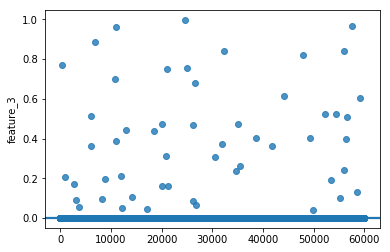

In [22]:
sns.regplot(np.arange(len(df['feature_3'])),df['feature_3'])

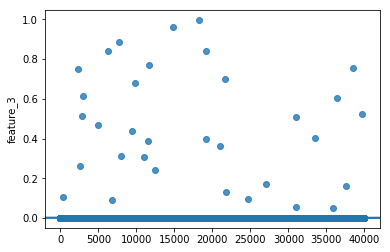

In [23]:
sns.regplot(np.arange(len(X_train_df['feature_3'])),X_train_df['feature_3'])

In [24]:
X_val_df = pd.DataFrame(X_val,columns=df.columns[1:])
X_val_df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
44032,0.00000,0.549000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.9920,...,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,0.0,0.80370,0.0000
3454,0.99200,0.855000,0.0,0.0,0.0000,0.0000,0.0,0.3060,0.7334,0.0000,...,0.0,0.0,0.2666,0.992,0.0,0.0,0.9920,0.0,0.00000,0.9920
14838,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.9960,...,0.0,0.0,0.7920,0.000,0.0,0.0,0.7607,0.0,0.00000,0.0196
55855,0.00000,0.666500,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,0.0,0.00000,1.0000
11023,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.9844,0.9920,...,0.0,0.0,0.0000,0.992,0.0,0.0,0.2432,0.0,0.03920,0.0000
10366,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.2000,0.0000,...,0.0,0.0,0.0000,0.996,0.0,0.0,0.9530,0.0,0.00000,0.5960
26143,0.00000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.6665,...,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,0.0,1.00000,0.0000
49496,0.08234,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.2432,0.0000,0.2783,...,0.0,0.0,0.9844,0.000,0.0,0.0,0.9844,0.0,0.00000,0.5566
2028,0.00000,0.011765,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.9920,...,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,0.0,0.06665,0.0000
36600,0.00000,0.992000,0.0,0.0,0.9727,0.9844,0.0,0.3882,0.0000,0.6626,...,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,0.0,0.99200,0.1294


In [25]:
X_test_df = pd.DataFrame(X_test,columns=df.columns[1:])
X_test_df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
12628,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.1059,0.0000,0.9805,...,0.0,0.0,0.0000,0.0941,0.0,0.0,0.0000,0.0,0.5215,0.9920
37730,0.0000,0.9960,0.0,0.0,0.0,0.451,0.0,0.3765,0.0000,0.9330,...,0.0,0.0,0.8745,0.0000,0.0,0.0,0.9883,0.0,0.0000,0.0000
39991,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.7880,0.3570,0.0000,...,0.0,0.0,0.9960,0.9960,0.0,0.0,0.0000,0.0,0.0000,0.0000
8525,0.0000,0.0392,0.0,0.0,0.0,0.000,0.0,0.0000,0.9920,0.0000,...,0.0,0.0,0.0000,0.9883,0.0,0.0,0.7180,0.0,0.7960,0.5566
8279,0.1216,0.0000,0.0,0.0,0.0,0.000,0.0,0.0000,0.9883,0.5960,...,0.0,0.0,0.0000,0.0000,0.0,0.0,0.9920,0.0,0.7960,0.0000
51012,0.1686,0.9883,0.0,0.0,0.0,0.000,0.0,0.7140,0.1412,0.0000,...,0.0,0.0,0.0000,0.9136,0.0,0.0,0.9370,0.0,0.0000,0.9453
14871,0.7256,0.0353,0.0,0.0,0.0,0.000,0.0,0.0000,0.9175,0.0000,...,0.0,0.0,0.2903,0.0000,0.0,0.0,0.3687,0.0,0.0000,0.0000
15127,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0000,0.0000,0.8667,...,0.0,0.0,0.9960,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000
9366,0.0000,0.6196,0.0,0.0,0.0,0.000,0.0,0.9920,0.0000,0.9920,...,0.0,0.0,0.9920,0.0000,0.0,0.0,0.9920,0.0,0.0000,0.0000
33322,0.0000,0.2510,0.0,0.0,0.0,0.000,0.0,1.0000,0.7490,1.0000,...,0.0,0.0,1.0000,0.0000,0.0,0.0,0.0000,0.0,1.0000,0.2510


In [26]:
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [27]:
X_val

array([[ 0.        ,  0.9089404 ,  0.        , ...,  0.        ,
         0.50359203, -0.42861479],
       [ 0.992     ,  1.41556291,  0.        , ...,  0.        ,
        -0.30962258,  0.57512901],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.30962258, -0.40878276],
       ...,
       [ 0.7646    ,  0.        ,  0.        , ...,  0.        ,
         0.69412122,  0.57512901],
       [ 0.        ,  0.03245033,  0.        , ...,  0.        ,
        -0.30962258,  0.57512901],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.69816857,  0.0394617 ]])

In [28]:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [29]:
y_train.shape

(40000,)

In [30]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_train)
pca_result

array([[-29.13899293,  -3.74323699,   0.70685081, -11.71112876],
       [ 50.70779399, -68.37249993,  74.89609046,  12.29350236],
       [-31.63108686, -10.88383537,  -3.06465356, -14.91348603],
       ...,
       [ 65.41229106,  13.26676181, -75.95823898, -42.55087479],
       [-31.13503796, -15.81418255,  -8.22384422,  -9.88694483],
       [-31.01054643, -13.56896224, -13.21816606,   8.51905765]])

In [31]:
pca.explained_variance_ratio_

array([0.32921403, 0.29636889, 0.20226517, 0.11076048])

In [32]:
X_train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.000,0.000000,0.0,0.0,0.0,0.0000,0.0,1.261658,0.000000,0.418851,...,0.0,0.0,1.515461,-0.128636,0.0,0.0,-0.507943,0.0,-0.134979,-0.428615
1,0.753,0.000000,0.0,0.0,0.0,0.0000,0.0,1.256340,2.000000,-0.577419,...,0.0,0.0,0.000000,0.924997,0.0,0.0,0.499848,0.0,0.702216,-0.242133
2,0.000,1.642384,0.0,0.0,0.0,0.0000,0.0,0.000000,0.000000,-0.577419,...,0.0,0.0,0.000000,0.469057,0.0,0.0,0.293433,0.0,0.694121,0.143074
3,0.200,1.636258,0.0,0.0,0.0,0.0000,0.0,1.336924,0.000000,-0.162198,...,0.0,0.0,0.483882,-0.128636,0.0,0.0,-0.507943,0.0,0.694121,0.571385
4,0.000,1.649007,0.0,0.0,0.0,0.2393,0.0,0.464958,0.110241,-0.577419,...,0.0,0.0,0.000000,-0.033217,0.0,0.0,-0.436507,0.0,-0.309623,-0.428615


In [33]:
pca_result[:,0]

array([-29.13899293,  50.70779399, -31.63108686, ...,  65.41229106,
       -31.13503796, -31.01054643])

In [34]:
X_train_df['labels'] = y_train
X_train_df['pca-one'] = pca_result[:,0]
X_train_df['pca-two'] = pca_result[:,1]
X_train_df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784,labels,pca-one,pca-two
0,0.000,0.000000,0.0,0.0,0.0000,0.00000,0.0,1.261658,0.000000,0.418851,...,-0.128636,0.0,0.0,-0.507943,0.0,-0.134979,-0.428615,3,-29.138993,-3.743237
1,0.753,0.000000,0.0,0.0,0.0000,0.00000,0.0,1.256340,2.000000,-0.577419,...,0.924997,0.0,0.0,0.499848,0.0,0.702216,-0.242133,4,50.707794,-68.372500
2,0.000,1.642384,0.0,0.0,0.0000,0.00000,0.0,0.000000,0.000000,-0.577419,...,0.469057,0.0,0.0,0.293433,0.0,0.694121,0.143074,5,-31.631087,-10.883835
3,0.200,1.636258,0.0,0.0,0.0000,0.00000,0.0,1.336924,0.000000,-0.162198,...,-0.128636,0.0,0.0,-0.507943,0.0,0.694121,0.571385,2,-1.821500,-7.849936
4,0.000,1.649007,0.0,0.0,0.0000,0.23930,0.0,0.464958,0.110241,-0.577419,...,-0.033217,0.0,0.0,-0.436507,0.0,-0.309623,-0.428615,5,-31.021667,-13.984466
5,0.000,0.000000,0.0,0.0,0.4626,0.00000,0.0,1.347559,0.000000,-0.142540,...,0.157516,0.0,0.0,-0.507943,0.0,-0.309623,-0.258019,6,-31.113786,-16.188361
6,0.000,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.000000,0.000000,-0.577419,...,-0.128636,0.0,0.0,0.492057,0.0,-0.309623,0.579176,7,-31.248018,-17.820466
7,0.000,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.855468,0.000000,-0.577419,...,0.360732,0.0,0.0,-0.190529,0.0,0.321259,0.579176,6,5.446091,0.261396
8,0.000,0.000000,0.0,0.0,0.0000,0.04315,0.0,0.000000,0.000000,-0.166129,...,-0.128636,0.0,0.0,0.460387,0.0,0.444197,0.364667,5,-29.726976,-10.337207
9,0.000,0.000000,0.0,0.0,0.0000,0.00000,0.0,0.962640,0.000000,-0.577419,...,0.920766,0.0,0.0,-0.507943,0.0,-0.309623,-0.428615,7,43.100313,-64.756674


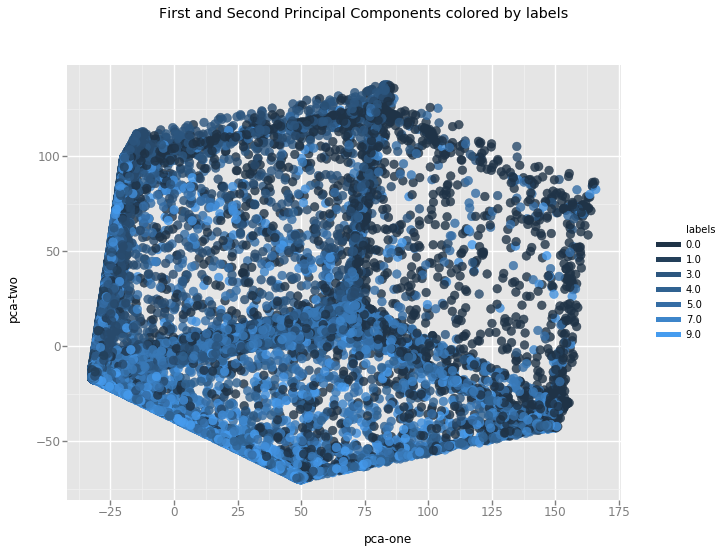

<ggplot: (-9223363241934161804)>

In [35]:
ggplot(X_train_df,aes(x='pca-one',y='pca-two',color='labels')) + geom_point(size=75,alpha=0.8) + ggtitle("First and Second Principal Components colored by labels")

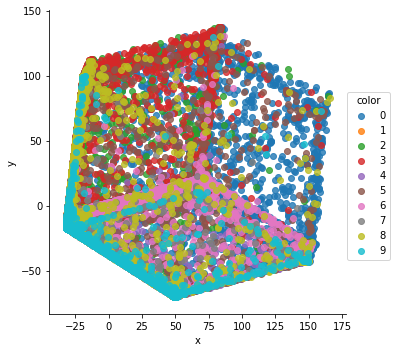

In [36]:
plot_df = pd.DataFrame(dict(x=X_train_df['pca-one'], y=X_train_df['pca-two'], color=X_train_df['labels']))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False)

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

In [37]:
pca.n_components_

4

In [111]:
pca_result

array([[-29.13899293,  -3.74323699,   0.70685081, -11.71112876],
       [ 50.70779399, -68.37249993,  74.89609046,  12.29350236],
       [-31.63108686, -10.88383537,  -3.06465356, -14.91348603],
       ..., 
       [ 65.41229106,  13.26676181, -75.95823898, -42.55087479],
       [-31.13503796, -15.81418255,  -8.22384422,  -9.88694483],
       [-31.01054643, -13.56896224, -13.21816606,   8.51905765]])

In [128]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=1000)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=1000,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [129]:
tsne_results = tsne.fit_transform(X_train)
tsne_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 40000 samples in 9.888s...
[t-SNE] Computed neighbors for 40000 samples in 596.350s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for 

array([[-11.93048191,  79.53975677],
       [-22.50103569, -68.29685974],
       [-24.83401299,  20.30836868],
       ..., 
       [ 87.70698547, -31.23234367],
       [-49.2790947 ,  51.18496704],
       [-45.20791245,   7.16764784]], dtype=float32)

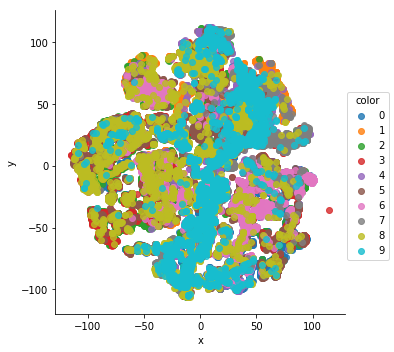

In [130]:
plot_df = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1], color=X_train_df['labels']))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False)

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

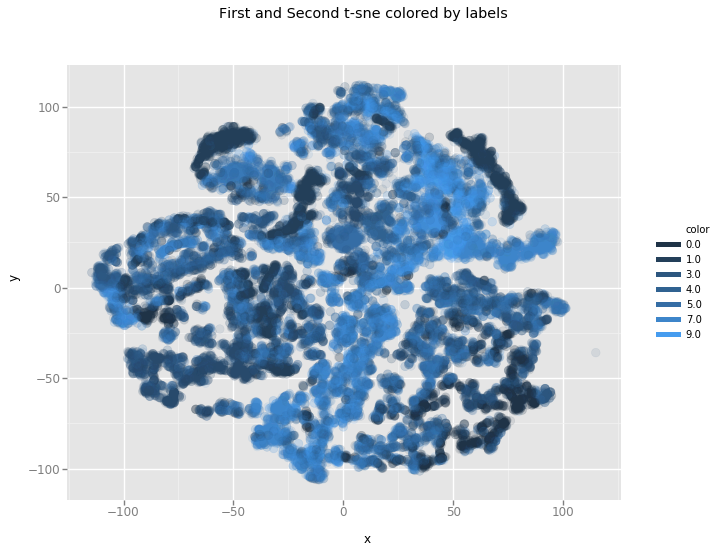

<ggplot: (8738686685995)>

In [131]:
ggplot(plot_df,aes(x='x',y='y',color='color')) + geom_point(size=75,alpha=0.1) + ggtitle("First and Second t-sne colored by labels")

In [ ]:
pca_50 = PCA(n_components=50)